In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Лабораторная работа № 1
В результате опыта была получена выборочная совокупность.
Задание:
1. ~~Составить вариационный ряд.~~
2. ~~Построить интервальный статистический ряд.~~
3. ~~По сгруппированным данным построить полигон относительных частот, гистограмму относительных частот, график эмпирической функции распределения.~~
4. ~~Найти числовые характеристики выборки: выборочное среднее, исправленную выборочную дисперсию, моду, медиану, эксцесс, асимметрию.~~
5. ~~По виду гистограммы и эмпирической функции распределения выборки выдвинуть гипотезу о распределении генеральной совокупности.~~
6. ~~Найти оценки параметров предполагаемого распределения генеральной совокупности.~~
7. ~~Построить на чертеже гистограммы и эмпирической функции её теоретические аналоги $f(x)$ и $F(x)$.~~
8. ~~Проверить выполнение правила «трех сигма».~~
9. Применить критерий согласия Пирсона принять или опровергнуть выдвинутую гипотезу о распределении генеральной совокупности.
10. ~~Найти доверительные интервалы для генеральной средней и генерального среднеквадратического отклонения по уровню надежности $\gamma$ = 0,95.~~

In [100]:
data = np.array([
    305, 316, 338, 316, 323, 301, 315, 
    313, 309, 311, 312, 304, 330, 313, 
    310, 321, 310, 302, 312, 317, 328, 
    316, 305, 325, 344, 320, 319, 320, 
    323, 322, 297, 324, 306, 301, 303, 
    295, 335, 311, 314, 316, 316, 310, 
    316, 300, 323, 324, 331, 320, 304
])

In [101]:
n = data.shape[0] # размер выборки

## Вариационный ряд

In [102]:
var_row = np.array(sorted(data))
print('Вариационный ряд:', *var_row)

Вариационный ряд: 295 297 300 301 301 302 303 304 304 305 305 306 309 310 310 310 311 311 312 312 313 313 314 315 316 316 316 316 316 316 317 319 320 320 320 321 322 323 323 323 324 324 325 328 330 331 335 338 344


## Построение интервального статистического ряда

In [103]:
x_min = np.min(data)
x_max = np.max(data)
print(f"1) Минимальное значение: {x_min}\n2) Максимальное значение: {x_max}\n ")

1) Минимальное значение: 295
2) Максимальное значение: 344
 


In [104]:
k = round(1 + 3.322 * np.log10(n)) # число интервалов
h = round((x_max - x_min) / k) + 1 # размер интервала
x_0 = x_min - h/2
intervals = np.array([np.array([x_0 + i * h, x_0 + (i + 1) * h]) for i in range(k)])
intervals

array([[291., 299.],
       [299., 307.],
       [307., 315.],
       [315., 323.],
       [323., 331.],
       [331., 339.],
       [339., 347.]])

In [105]:
freq_row = np.array([var_row[(var_row >= min) & (var_row < max)].shape[0] for min, max in intervals], dtype=np.int8)
emp_freq_row = freq_row / data.shape[0]
p_hist = emp_freq_row / h

In [106]:
columns = [f"[{int(l)}, {int(r)})" for l, r in intervals]

In [107]:
df = pd.DataFrame(
    np.vstack((np.mean(intervals, axis=1), freq_row, emp_freq_row, p_hist)), 
    columns=columns, dtype=pd.Int8Dtype
) 
df.index = ["Среднее по интервалу", "Частота", "Эмпирическая частота", "Высота гистограммы"]

In [108]:
df

,"[291, 299)","[299, 307)","[307, 315)","[315, 323)","[323, 331)","[331, 339)","[339, 347)"
Среднее по интервалу,295.0,303.0,311.0,319.0,327.0,335.0,343.0
Частота,2.0,10.0,11.0,14.0,8.0,3.0,1.0
Эмпирическая частота,0.040816,0.204082,0.22449,0.285714,0.163265,0.061224,0.020408
Высота гистограммы,0.005102,0.02551,0.028061,0.035714,0.020408,0.007653,0.002551


## Построение графиков

In [109]:
mean_row = np.array(df.loc['Среднее по интервалу'], dtype=np.int_)
right_row = intervals[:, -1].astype(np.int_)
beauty_columns = list(map(lambda x: '\n'.join(x), zip(map(lambda x: str(x), mean_row), columns)))
beauty_columns_right = list(map(lambda x: '\n'.join(x), zip(map(lambda x: str(x), right_row), columns)))
p_sum = [0, i:=0] + (f:=[i := i + p for p in np.array(df.loc['Эмпирическая частота'], dtype=np.float_)]) + [f[-1]]

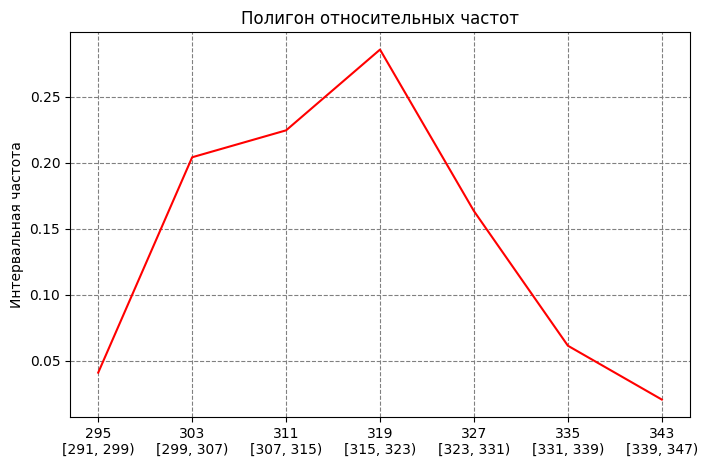

In [110]:
plt.figure(figsize=(8,5))
plt.title('Полигон относительных частот')
plt.rc('axes', axisbelow=True)
plt.plot(mean_row, emp_freq_row, color='red')
plt.xticks(mean_row, beauty_columns);
plt.grid(color='gray', linestyle='dashed')
plt.ylabel('Интервальная частота');

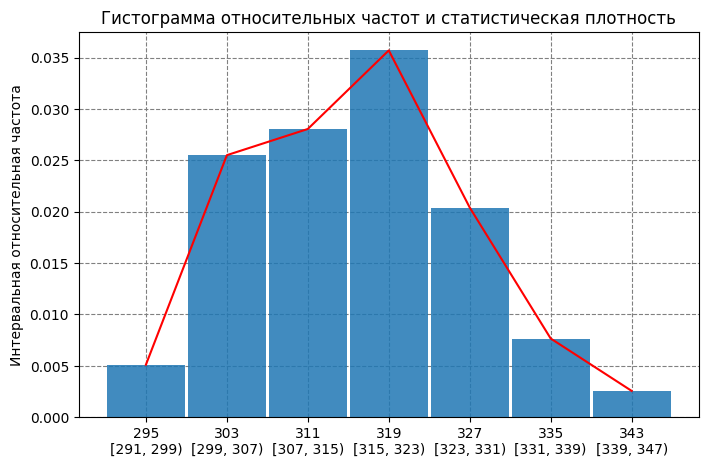

In [111]:
plt.figure(figsize=(8,5))
plt.title('Гистограмма относительных частот и статистическая плотность')
plt.rc('axes', axisbelow=True)
plt.bar(mean_row, p_hist, width=h - 0.3, alpha=0.85)
plt.grid(color='gray', linestyle='dashed')
plt.plot(mean_row, p_hist, color='red')
plt.xticks(mean_row, beauty_columns);
plt.ylabel('Интервальная относительная частота');

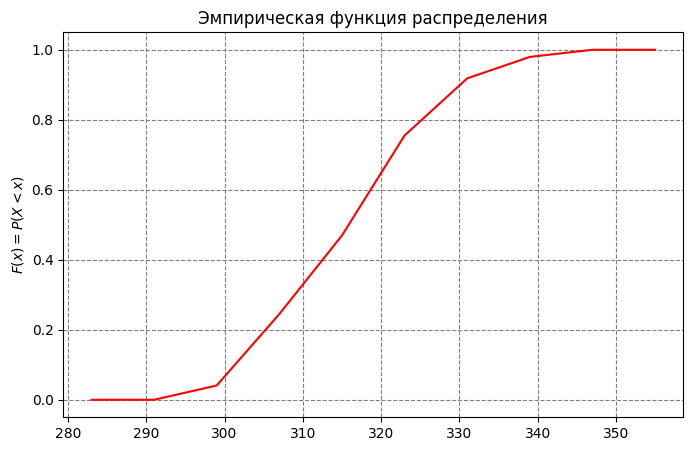

In [112]:
plt.figure(figsize=(8,5))
plt.title('Эмпирическая функция распределения')
plt.rc('axes', axisbelow=True)
plt.grid(color='gray', linestyle='dashed')
plt.ylabel('$F(x) = P(X < x)$')
plt.plot(np.hstack((intervals[0, 0] - h, intervals[0][0], right_row, intervals[-1, -1] + h)), p_sum, color='red');

## Числовые характеристики выборки

In [113]:
import scipy.stats.mstats as ms
import scipy.stats as st

In [114]:
mean = np.mean(data)
corrected_sample_variance = (n/(n-1)) * np.var(data)
std = np.sqrt(corrected_sample_variance)
mode = var_row[n // 2 + 1]
median = np.median(data)
asymmetry = ms.moment(data, 3) / std ** 3
excess = ms.moment(data, 4) / std ** 4 - 3

print(f"""Выборочные характеристики: 
1) Выборочное среднее: {mean};
2) Исправленная выборочная дисперсия: {corrected_sample_variance};
3) Среднеквадратическое отклонение: {std};
4) Мода: {mode};
5) Медиана: {median};
6) Коэффициент асимметрии: {asymmetry};
7) Эксцесс: {excess};
""")

Выборочные характеристики: 
1) Выборочное среднее: 315.2244897959184;
2) Исправленная выборочная дисперсия: 112.59438775510202;
3) Среднеквадратическое отклонение: 10.611050266354505;
4) Мода: 316;
5) Медиана: 316.0;
6) Коэффициент асимметрии: 0.3892669999573177;
7) Эксцесс: -0.0823160918567929;



## Предположение о распределении

По виду гистограммы и характеристикам выборки можно выдвинуть предположение о том, что генеральная совокупность распределена по нормальному закону распределения с параметрами $a$ и $\sigma^2$.

Тогда плотность распределения будет иметь следующий вид: $$f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x - a}{\sigma})^2}$$

## Поиск оценок

Найдем оценки параметров предполагаемого распределения генеральной совокупности при помощи метода моментов.

По методу моментов, положим, что $M\xi = \overline{x}$ и $D\xi = \overline{s}^2$. 

Исходя из предположения о нормальности, получим следующие оценки параметров генеральной совокупности: $a = \overline{x}$ и $\sigma^2 = \overline{s}^2$.

## Построение теоретических аналогов

In [115]:
p_teor_x = np.linspace(280, 360, 1000)
f = lambda x: (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean)/(std)) ** 2)
p_teor_y = f(p_teor_x)

In [116]:
import scipy
fr_teor_x = np.linspace(270, 360, 1000)
F = lambda x: scipy.stats.norm.cdf((x - mean)/(std))
fr_teor_y = F(fr_teor_x)

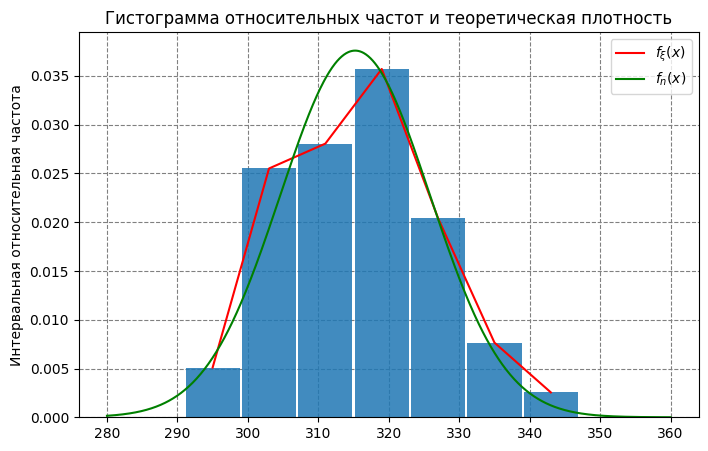

In [117]:
plt.figure(figsize=(8,5))
plt.title('Гистограмма относительных частот и теоретическая плотность')
plt.rc('axes', axisbelow=True)
plt.bar(mean_row, p_hist, width=h - 0.3, alpha=0.85)
plt.grid(color='gray', linestyle='dashed')
plt.plot(mean_row, p_hist, color='red')
plt.plot(p_teor_x, p_teor_y, color='green')
plt.ylabel('Интервальная относительная частота');
plt.legend([
    r"$f_{\xi}(x)$",
    r"$f_{n}(x)$"
])

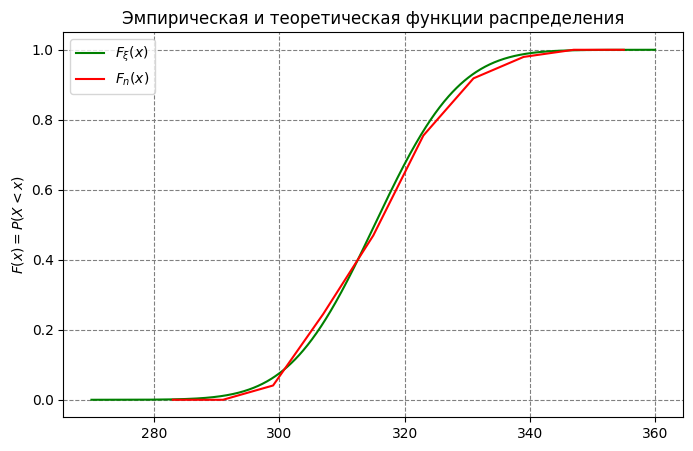

In [118]:
plt.figure(figsize=(8,5))
plt.title('Эмпирическая и теоретическая функции распределения')
# plt.rc('axes', axisbelow=True)
plt.grid(color='gray', linestyle='dashed')
plt.plot(fr_teor_x, fr_teor_y, color='green')
plt.ylabel('$F(x) = P(X < x)$')
plt.plot(np.hstack((intervals[0, 0] - h, intervals[0][0], right_row, intervals[-1, -1] + h)), p_sum, color='red');
plt.legend([
    r"$F_{\xi}(x)$",
    r"$F_{n}(x)$"
])

## Проверка правила трех сигма

In [119]:
bounds_sigma = [mean - 3 * std, mean + 3 * std]

In [120]:
in_bounds_sigma = 0
for elem in data:
    if bounds_sigma[0] < elem < bounds_sigma[1]:
        in_bounds_sigma += 1
print(f'Относительная частота попадания элементов выборки в интервал трех сигма: {in_bounds_sigma/n}')

Относительная частота попадания элементов выборки в интервал трех сигма: 1.0


Поскольку $P[x_i \in (\overline{x} - 3\overline{s}, \overline{x} + 3\overline{s})] = 1$, $i=\overline{1, n}$, получаем, что правило трех сигм выполняется, поскольку почти все (в данном случае, все) значения попали в интервал 

## Поиск доверительных интервалов для генеральной средней и генерального среднеквадратического отклонения по уровню надежности $\gamma$ = 0,95

1) Найдем доверительный интервал по уровню надежности $\gamma = 0,95$ (уровню значимости $\alpha = 1 - 0,95 = 0,05$) для математического ожидания $\theta_1 = a$ в модели $N(\theta_1, \theta_2) = N(a, \sigma)$ при неизвестном $\sigma$, пользуясь формулой: $$P[\overline{x} - \frac{S}{\sqrt{n - 1}}t_{\gamma} \leq a \leq \overline{x} + \frac{S}{\sqrt{n - 1}}t_{\gamma}] = \gamma = 1 - \alpha$$

Найдем значение критической точки распределения Стьюдента $t_{\gamma}$ для уровня значимости $\alpha = 0,05$ и числа степеней свободы $n - 1 = 59$:

In [121]:
gamma = 0.95
d = n - 1
alpha = 1 - gamma
t = st.t.ppf(q=1-alpha/2, df=d)
t

2.0106347546964454

Вычислим значения интервалов, используя обычную (несмещенную дисперсию):

In [122]:
v = np.var(data)
eps = (np.sqrt(v) * t)/(np.sqrt(n - 1))
intervals_a = np.array([
    mean - eps, mean + eps
])
intervals_a

array([312.1766403 , 318.27233929])

Получим, что $P[312.18 \leq a \leq 318.27] = 0.95$

2) Найдем доверительный интервал по уровню надежности $\gamma = 0,95$ (уровню значимости $\alpha = 1 - 0,95 = 0,05$) для дисперсии $\theta_2 = \sigma$ в модели $N(\theta_1, \theta_2) = N(a, \sigma)$ при неизвестном $a$, пользуясь формулой: $$P[\sqrt{\frac{(n - 1)S^2}{\chi_{n - 1, \frac{\alpha}{2}}^2}} \leq \sigma \leq \sqrt{\frac{(n - 1)S^2}{\chi_{n - 1, 1 - \frac{\alpha}{2}}^2}}] = \gamma = 1 - \alpha$$

Вычислим значения интервалов, используя обычную (несмещенную дисперсию) и значение критической точки распределения $\chi^2$ для уровня значимости $\alpha = 0,05$ и числа степеней свободы $n - 1 = 59$:

In [123]:
gamma = 0.95
alpha = 1 - gamma
val_alpha_1 = alpha/2
val_alpha_2 = 1 - alpha/2
chi2_1, chi2_2 = st.chi2.ppf(q=1-val_alpha_1, df=d), st.chi2.ppf(q=1-val_alpha_2, df=d)
chi2_1, chi2_2

(69.02258578966607, 30.754505709372918)

In [124]:
numerator = (n - 1) * v
intervals_sigma = np.array([
    np.sqrt(numerator / chi2_1), np.sqrt(numerator / chi2_2)
])
intervals_sigma

array([ 8.75802048, 13.12040357])

Получим, что $P[8.76 \leq \sigma \leq 13.12] = 0.95$

## Применение критерия согласия Пирсона для принятия или опровержения выдвинутой гипотезы о распределении генеральной совокупности

Исследуем гипотезу о том, что исходная выборка распределена нормально с параметрами $a = \overline{x}$ и $\sigma^2 = \overline{s}^2$.

Исследуем интервалы из интервального ряда.

In [125]:
df

,"[291, 299)","[299, 307)","[307, 315)","[315, 323)","[323, 331)","[331, 339)","[339, 347)"
Среднее по интервалу,295.0,303.0,311.0,319.0,327.0,335.0,343.0
Частота,2.0,10.0,11.0,14.0,8.0,3.0,1.0
Эмпирическая частота,0.040816,0.204082,0.22449,0.285714,0.163265,0.061224,0.020408
Высота гистограммы,0.005102,0.02551,0.028061,0.035714,0.020408,0.007653,0.002551


Поскольку критерий чувствителен к числу наблюдений, попавших в каждый интервал, объединим интервалы, эмпирическая частота которых не превышает пяти, с соседними. Первый интервал соединим со вторым, так же поступим и с последними тремя. Получим новый интервальный ряд.

In [140]:
new_intervals = np.array([
    [291, 307],
    [307, 315],
    [315, 323],
    [323, 347]
])
new_freq_row = np.array([
    np.sum(freq_row[:2]), freq_row[2], freq_row[3], np.sum(freq_row[4:])
])
new_emp_freq_row = np.array([
    np.sum(emp_freq_row[:2]), emp_freq_row[2], emp_freq_row[3], np.sum(emp_freq_row[4:])
])
new_p_hist = np.array([
    np.sum(p_hist[:2]), p_hist[2], p_hist[3], np.sum(p_hist[4:])
])
new_columns = [f"[{int(l)}, {int(r)})" for l, r in new_intervals]
new_df = pd.DataFrame(
    np.vstack((np.mean(new_intervals, axis=1), new_freq_row, new_emp_freq_row, new_p_hist)), 
    columns=new_columns, dtype=pd.Int8Dtype
) 
new_df.index = ["Среднее по интервалу", "Частота", "Эмпирическая частота", "Высота гистограммы"]

In [149]:
k = len(new_p_hist)
k

4

In [141]:
new_df

,"[291, 307)","[307, 315)","[315, 323)","[323, 347)"
Среднее по интервалу,299.0,311.0,319.0,335.0
Частота,12.0,11.0,14.0,12.0
Эмпирическая частота,0.244898,0.22449,0.285714,0.244898
Высота гистограммы,0.030612,0.028061,0.035714,0.030612


Вычислим значения теоретических частот: $n_i' = np_i$, где $p_i = P(x \in [a_i, b_i)) = F(b_i) - F(a_i) = \Phi(\frac{b_i - a}{\sigma}) - \Phi(\frac{a_i - a}{\sigma})$; $a_i, b_i$ - границы $i$-го интервала.

In [146]:
p_i = np.array([F(b) - F(a) for a, b in new_intervals])
n_i = n * p_i
n_i

array([10.18844134, 13.34840674, 13.55298774, 11.29321268])

Вычислим значение меры расхождения между теоретическим и выборочным распределениями по следующей формуле:
$$\chi^2 = \sum_{i=1}^k{\frac{(n_i - n_i')^2}{n_i'}}$$

In [154]:
chi = np.sum(((new_freq_row - n_i) ** 2) / n_i)
chi

0.794241673134284

$\chi^2 = 0.79$

Вычислим число степеней свободы $r = k - l - 1$, где $k$ - число интервалов, $l$ - число неизвестных параметров распределения.

In [156]:
r = k - 2 - 1
r

1

Выберем уровень значимости $\alpha = 0.05$. По таблице распределения $\chi^2$ по уровню значимости $\alpha$ и числу степеней свободы $r$ найдем $\chi_{\alpha, r}^2$. 

Получим: $\chi_{\alpha, r}^2 = 3.8$.

Поскольку $\chi^2 \leq \chi_{\alpha, r}^2$, то с вероятностью $\gamma = 1 - \alpha = 0.95$ гипотеза принимается.